# 3D, STL, OBJ & Stuff

## Snippets

### Simple STL files (Discovery)

- [ ] Simplex
- [ ] Pyramid
- [ ] Explore qwirks: repr of outer faces, normals maybe not used, right-hand side rule, etc.




In [1]:
facet = """
facet normal {n[0]} {n[1]} {n[2]}
    outer loop
        vertex {t[0][0]} {t[0][1]} {t[0][2]}
        vertex {t[1][0]} {t[1][1]} {t[1][2]}
        vertex {t[2][0]} {t[2][1]} {t[2][2]}
    endloop
endfacet
"""

In [2]:
import numpy as np
normal = np.array([1.0, 1.0, 1.0], dtype=np.float32)
normal /= np.linalg.norm(normal)
normal

array([0.57735026, 0.57735026, 0.57735026], dtype=float32)

In [3]:
triangle = np.array([
    [1.0, 0.0, 0.0], 
    [0.0, 1.0, 0.0], 
    [0.0, 0.0, 1.0],
], dtype=np.float32)

In [4]:
print(facet.format(n=normal, t=triangle))


facet normal 0.5773502588272095 0.5773502588272095 0.5773502588272095
    outer loop
        vertex 1.0 0.0 0.0
        vertex 0.0 1.0 0.0
        vertex 0.0 0.0 1.0
    endloop
endfacet



In [5]:
name = "simplex"

solid = f"""
solid {name}

{facet.format(n=normal, t=triangle)}

endsolid {name}
"""

print(solid)


solid simplex


facet normal 0.5773502588272095 0.5773502588272095 0.5773502588272095
    outer loop
        vertex 1.0 0.0 0.0
        vertex 0.0 1.0 0.0
        vertex 0.0 0.0 1.0
    endloop
endfacet


endsolid simplex



In [6]:
with open(f"sandbox/{name}.stl", mode="wt") as file:
    file.write(solid)

In [7]:
name = "simplex"

solid = f"""
solid {name}

{facet.format(n=-normal, t=triangle)}

endsolid {name}
"""

print(solid)


solid simplex


facet normal -0.5773502588272095 -0.5773502588272095 -0.5773502588272095
    outer loop
        vertex 1.0 0.0 0.0
        vertex 0.0 1.0 0.0
        vertex 0.0 0.0 1.0
    endloop
endfacet


endsolid simplex



In [8]:
name = "simplex-opposite-normal"
with open(f"sandbox/{name}.stl", mode="wt") as file:
    file.write(solid)

In [9]:
normal = np.array([12.0, -56.0, 456.0], dtype=np.float32)

name = "simplex"

solid = f"""
solid {name}

{facet.format(n=normal, t=triangle)}

endsolid {name}
"""

print(solid)


name = "simplex-random-normal"
with open(f"sandbox/{name}.stl", mode="wt") as file:
    file.write(solid)


solid simplex


facet normal 12.0 -56.0 456.0
    outer loop
        vertex 1.0 0.0 0.0
        vertex 0.0 1.0 0.0
        vertex 0.0 0.0 1.0
    endloop
endfacet


endsolid simplex



In [10]:
normal = np.array([0.0, 0.0, 0.0], dtype=np.float32)

name = "simplex"

solid = f"""
solid {name}

{facet.format(n=normal, t=triangle)}

endsolid {name}
"""

print(solid)


name = "simplex-zero-normal"
with open(f"sandbox/{name}.stl", mode="wt") as file:
    file.write(solid)


solid simplex


facet normal 0.0 0.0 0.0
    outer loop
        vertex 1.0 0.0 0.0
        vertex 0.0 1.0 0.0
        vertex 0.0 0.0 1.0
    endloop
endfacet


endsolid simplex



**TODO** warning about the behavior of the readers wrt normals and outer/inner representation.
Inner may be displayed as outer or not at all and the normal may not be used.

AFAICT the GitHub viewer will:

- discard the normal info when it comes to determine the normal (use orientation instead)

- only display the outer face

- BUT, display this face is black when the normal in the file does not match its computation.

YMML


In [11]:
import numpy as np
normal = np.array([1.0, 1.0, 1.0], dtype=np.float32)
normal /= np.linalg.norm(normal)

triangle = np.array([
    [1.0, 0.0, 0.0], 
    [0.0, 1.0, 0.0], 
    [0.0, 0.0, 1.0],
], dtype=np.float32)

R = np.array([
    [0.0, -1.0, 0.0],
    [1.0,  0.0, 0.0],
    [0.0,  0.0, 1.0],
], dtype=np.float32)

with open("sandbox/pyramid.stl", mode="tw") as file:
    file.write("solid pyramid\n\n")
    for i in [0, 1, 2, 3]:
        file.write(facet.format(n=normal, t=triangle))
        normal = R @ normal
        triangle = triangle @ R.T
    file.write("endsolid pyramid\n")


### Getting Serious

- [ ] Make function (triangles, normals=None, name=None) -> STL string
- [ ] **TODO** Make STL (text) tokenizer + parser into triangles / normals array
- [ ] **TODO** Make "condition number" + "strict normal checker" (optionally rewriter)
- [ ] Obj to STL (**TODO**: make normals (opt.) + points + indices -> normals, triangles instead

#### Make STL from numpy data

In [12]:
import numpy as np

def make_STL(triangles, normals=None, name=""):
    triangles = np.array(triangles, dtype=np.float32)
    if normals is None:
        d1 = triangles[:,1,:] - triangles[:,0,:]
        d2 = triangles[:,2,:] - triangles[:,1,:]
        print(d1.shape)
        vector_product = np.linalg.cross(d1, d2)
        norms = np.linalg.norm(vector_product, axis=1)
        normals = np.diag(1 / norms) @ vector_product 
    out = f"solid {name}\n"
    for t, n in zip(triangles, normals):
        out += f"""
facet normal {n[0]} {n[1]} {n[2]}
    outer loop
        vertex {t[0][0]} {t[0][1]} {t[0][2]}
        vertex {t[1][0]} {t[1][1]} {t[1][2]}
        vertex {t[2][0]} {t[2][1]} {t[2][2]}
    endloop
endfacet
"""
    out += f"\nendsolid {name}\n"
    return out

In [13]:
import numpy as np
normals = np.array([1.0, 1.0, 1.0], dtype=np.float32)
normals /= np.linalg.norm(normals)
normals = np.array([normals], dtype=np.float32)

triangles = np.array([[
    [1.0, 0.0, 0.0], 
    [0.0, 1.0, 0.0], 
    [0.0, 0.0, 1.0],
]], dtype=np.float32)


out = make_STL(triangles, normals, name="simplex")
print(out)

solid simplex

facet normal 0.5773502588272095 0.5773502588272095 0.5773502588272095
    outer loop
        vertex 1.0 0.0 0.0
        vertex 0.0 1.0 0.0
        vertex 0.0 0.0 1.0
    endloop
endfacet

endsolid simplex



In [14]:
out = make_STL(triangles)
print(out)

(1, 3)
solid 

facet normal 0.5773502588272095 0.5773502588272095 0.5773502588272095
    outer loop
        vertex 1.0 0.0 0.0
        vertex 0.0 1.0 0.0
        vertex 0.0 0.0 1.0
    endloop
endfacet

endsolid 



#### Make STL (text) tokenizer + parser -> numpy data (drop name)


In [38]:
keywords = ["solid", "endsolid", "facet", "endfacet", "outer", "loop", "endloop", "vertex"]

def tokenize(STL_text):
    raw_tokens = STL_text.split()
    # turn numbers into float32
    # get rid of non-keywords names
    tokens = []
    for s in raw_tokens:
        try:
            tokens.append(np.float32(s))
        except ValueError:
            if s in keywords:
                tokens.append(s)
    return tokens

tokenize(out)


['solid',
 'facet',
 np.float32(0.57735026),
 np.float32(0.57735026),
 np.float32(0.57735026),
 'outer',
 'loop',
 'vertex',
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 'vertex',
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 'vertex',
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 'endloop',
 'endfacet',
 'endsolid']

In [39]:
def parse(tokens):
    normals = []
    for i, token in enumerate(tokens):
        if token == "facet":
            normals.append(np.array(tokens[i+1:i+4]))
    triangles = []
    for i, token in enumerate(tokens):
        if token == "loop":
            triangle = []
            triangle.append(np.array(tokens[i+2:i+5]))
            triangle.append(np.array(tokens[i+6:i+9]))
            triangle.append(np.array(tokens[i+10:i+13]))
            triangles.append(np.array(triangle))
    return np.array(triangles), np.array(normals)

In [40]:
parse(tokenize(out))

(array([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]], dtype=float32),
 array([[0.57735026, 0.57735026, 0.57735026]], dtype=float32))

#### Make "degenerate triangles" + “condition number” + “strict normal checker” (optionally rewriter)

**TODO**

#### Obj to STL

In [16]:
with open("data/bunny.obj", mode="tr") as file:
    bunny_obj = file.read()
lines = bunny_obj.splitlines()
for line in lines[:10]:
    print(line)
print("...")
for line in lines[-10:]:
    print(line)

# OBJ file format with ext .obj
# vertex count = 2503
# face count = 4968
v -3.4101800e-003 1.3031957e-001 2.1754370e-002
v -8.1719160e-002 1.5250145e-001 2.9656090e-002
v -3.0543480e-002 1.2477885e-001 1.0983400e-003
v -2.4901590e-002 1.1211138e-001 3.7560240e-002
v -1.8405680e-002 1.7843055e-001 -2.4219580e-002
v 1.9067940e-002 1.2144925e-001 3.1968440e-002
v 6.0412000e-003 1.2494359e-001 3.2652890e-002
...
f 2187 2188 2194
f 2308 2315 2300
f 2407 2375 2362
f 2443 2420 2503
f 2420 2411 2503
f 2411 1493 2503
f 1493 1487 2503
f 1487 1318 2503
f 1318 1320 2503
f 1320 2443 2503


In [17]:
vertices = []
face_indices = []
with open("data/bunny.obj", mode="tr") as file:
    lines = file.read().splitlines()
for line in lines:
    if line.startswith("#"):
        pass
    elif line.startswith("v"):
        coords = [np.float32(f) for f in line.split()[1:]]
        vertices.append(np.array(coords))
    elif line.startswith("f"):
        indices = [int(i) for i in line.split()[1:]]
        face_indices.append(indices)
vertices = np.array(vertices)
print(vertices)
print(face_indices[:50])

[[-0.00341018  0.13031957  0.02175437]
 [-0.08171916  0.15250145  0.02965609]
 [-0.03054348  0.12477885  0.00109834]
 ...
 [-0.01389549  0.16787168 -0.02189723]
 [-0.069413    0.15121847 -0.04453854]
 [-0.0550398   0.0573097   0.0169909 ]]
[[1069, 1647, 1578], [1058, 909, 939], [421, 1176, 238], [1055, 1101, 1042], [238, 1059, 1126], [1254, 30, 1261], [1065, 1071, 1], [1037, 1130, 1120], [1570, 2381, 1585], [2434, 2502, 2473], [1632, 1654, 1646], [1144, 1166, 669], [1202, 1440, 305], [1071, 1090, 1], [1555, 1570, 1584], [1184, 1174, 404], [65, 432, 12], [1032, 1085, 574], [1789, 2207, 2223], [1154, 1118, 1184], [1141, 1086, 1154], [99, 1117, 342], [404, 1174, 419], [489, 2000, 1998], [1118, 1174, 1184], [1196, 403, 136], [1495, 717, 1490], [1804, 402, 1207], [2272, 1398, 891], [1100, 1002, 804], [1596, 1595, 2381], [208, 420, 1207], [402, 208, 1207], [1455, 1935, 1925], [1176, 1059, 238], [1150, 1040, 348], [1957, 1537, 2051], [1124, 1189, 939], [1804, 1207, 1823], [1381, 1300, 1109], 

In [18]:
# WARNING: face_indices use 0-indexing
faces = np.zeros((len(face_indices), 3, 3), dtype=np.float32)
for index, (i, j, k) in enumerate(face_indices):
    faces[index] = [vertices[i-1], vertices[j-1], vertices[k-1]]
faces

array([[[-0.08656194,  0.14249188,  0.00843268],
        [-0.08969839,  0.13971257,  0.01377476],
        [-0.08949102,  0.14392582,  0.01248849]],

       [[-0.08636751,  0.10906537,  0.01198064],
        [-0.08591138,  0.10968787,  0.00765824],
        [-0.0870559 ,  0.10562761,  0.00976511]],

       [[-0.02630372,  0.12518875,  0.01739298],
        [-0.02738318,  0.12324257,  0.02165886],
        [-0.02585131,  0.12182948,  0.02607967]],

       ...,

       [[-0.05446366,  0.05535745,  0.01032684],
        [-0.05145855,  0.05587815,  0.01590035],
        [-0.0550398 ,  0.0573097 ,  0.0169909 ]],

       [[-0.05145855,  0.05587815,  0.01590035],
        [-0.05290982,  0.05704307,  0.02098841],
        [-0.0550398 ,  0.0573097 ,  0.0169909 ]],

       [[-0.05290982,  0.05704307,  0.02098841],
        [-0.05816759,  0.05998519,  0.02260606],
        [-0.0550398 ,  0.0573097 ,  0.0169909 ]]], dtype=float32)

In [19]:
stl_text = make_STL(faces, name="bunny")
with open("sandbox/bunny.stl", mode="tw") as file:
    file.write(stl_text)

(4968, 3)


### CSG

Copy-paste the code, then check STL file with an external viewer.

- [ ] **TODO** JSON graph -> signed distance function (interpreter). STEPS: without then with refs
- [ ] **TODO** Derive the classes / monkey-patch the lib to deliver a JSON graph (a la pytorch)?

In [20]:
from sdf import *

f = sphere(1) & box(1.5)

c = cylinder(0.5)
f -= c.orient(X) | c.orient(Y) | c.orient(Z)

f.save("out.stl")

min -0.84543, -0.84543, -0.84543
max 0.845431, 0.845431, 0.845431
step 0.0104847, 0.0104847, 0.0104847
4657463 samples in 216 batches with 12 workers
  100% (216 of 216) [##############################] 0:00:01 0:00:00    
44 skipped, 60 empty, 112 nonempty
291028 triangles in 0.781532 seconds


### Binary STL

- [ ] Discover that `out.stl` is not ASCII text, but binary
- [ ] Read about binary STL online
- [ ] Ask if there is anything useful in the first 80 bytes (header)
- [ ] Read the number of triangles `n` (hint to `numpy.fromfile`); check that works out.
- [ ] Check that the lenth of the binary data checks out with this count and the spec
- [ ] Read the numeric data as a `(n, 12)` array of `float32`
- [ ] Extract from this array the `normals` (shape `(n, 3)`) and `vertices` (shape `(n, 3, 3)`) arrays.

In [21]:
with open("out.stl", mode="rb") as file:
    print(file.read(200))

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd4p\x04\x00\x81g0\xbf\xa2.\x03\xbf\xa2.\x03\xbfB+0\xbf+\x8a\x02\xbf\x88!\x04\xbfB+0\xbf\x88!\x04\xbf+\x8a\x02\xbf1Z1\xbf+\x8a\x02\xbf+\x8a\x02\xbf\x00\x00\xbb\x0b.\xbf\x1f\x13\x06\xbflh\x03\xbf#|-\xbfJ9\x05\xbf\xf9\x00\x05\xbf#|-\xbf\x8c\xa3\x07\xbf+\x8a\x02\xbfhX/\xbfJ9\x05\xbf+\x8a\x02\xbf\x00\x00\xbb\x0b.\xbflh\x03\xbf\x1f\x13\x06\xbf#|-\xbf'


In [22]:
with open("out.stl", mode="rb") as file:
    header = file.read(80)
header == 80 * bytes([0])

True

In [23]:
import numpy as np
with open("out.stl", mode="rb") as file:
    n = np.fromfile(file, dtype=np.uint32, count=1, offset=80)
n[0]

np.uint32(291028)

In [24]:
# Alternative (better): read header, then the offset not necessary
# TODO: warn about "cursor" and offset with numpy.fromfile for something partially read
# Suggest a little experiment maybe to discover what's going on.
import numpy as np
with open("out.stl", mode="rb") as file:
    header = file.read(80)
    n = np.fromfile(file, dtype=np.uint32, count=1)[0]
print(n)

291028


In [25]:
import numpy as np
with open("out.stl", mode="rb") as file:
    data = file.read()
    print(len(data))
    print(80 + 4 + n * (4*4*3 + 2))

14551484
14551484


In [26]:
import numpy as np
with open("out.stl", mode="rb") as file:
    header = file.read(80)
    n = np.fromfile(file, dtype=np.uint32, count=1)[0]
    data = np.empty((n, 4 * 3), dtype=np.float32)
    for i in range(n):
        data[i] = np.fromfile(file, dtype=np.float32, count=12)
        _ = file.read(2)

In [27]:
normals = data[:,0::4]
x = data[:,1::4]
y = data[:,2::4]
z = data[:,3::4]
vertices = np.stack((x, y, z), axis=1)
np.shape(vertices)

(291028, 3, 3)

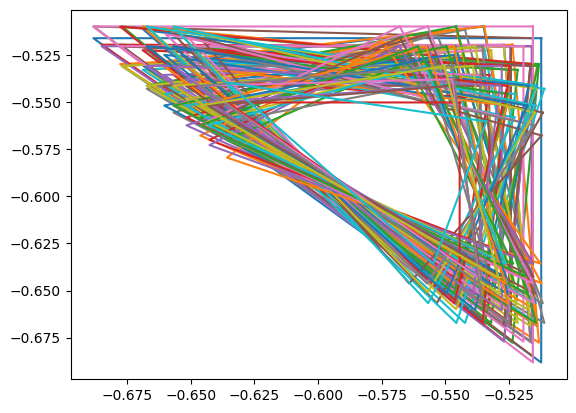

In [28]:
# Something fishy here, maybe the data computation above (the stacking?),
# maybe something else. And VERY SLOW of course.
import matplotlib.pyplot as plt
fig = plt.figure()
for vs in vertices[:100]:
    x = [v[0] for v in vs]
    y = [v[1] for v in vs]
    x.append(x[0])
    y.append(y[0])
    plt.plot(x, y)

### Matplotlib 3D first try

Mmmm there is some `meshio` stuff here. Too complex actually, lead the students to make their own micro-matplotlib3d.

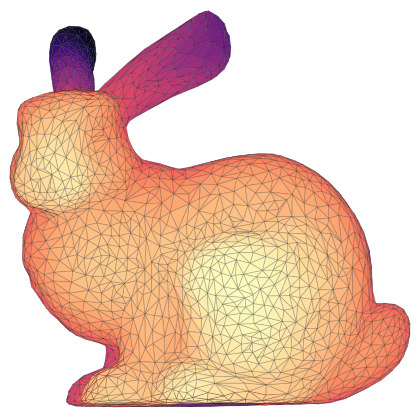

In [58]:
import numpy as np
from mpl3d import glm
from mpl3d.mesh import Mesh
from mpl3d.camera import Camera
import meshio
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1], xlim=[-1,+1], ylim=[-1,+1], aspect=1)
ax.axis("off")

camera = Camera("ortho", scale=2)
mesh = meshio.read("data/bunny.obj")
vertices = mesh.points
faces = mesh.cells[0].data
vertices = glm.fit_unit_cube(vertices)
mesh = Mesh(ax, camera.transform, vertices, faces,
            cmap=plt.get_cmap("magma"),  edgecolors=(0,0,0,0.25))
plt.show()


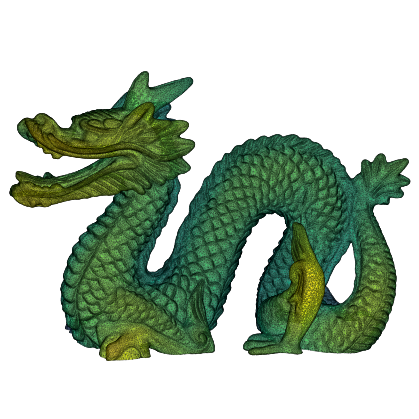

In [67]:
import numpy as np
from mpl3d import glm
from mpl3d.mesh import Mesh
from mpl3d.camera import Camera
import meshio
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1], xlim=[-1,+1], ylim=[-1,+1], aspect=1)
ax.axis("off")

camera = Camera("ortho", theta=75.0, scale=2.0)
mesh = meshio.read("data/dragon.stl")
vertices = mesh.points
faces = mesh.cells[0].data
vertices = glm.fit_unit_cube(vertices)
mesh = Mesh(ax, camera.transform, vertices, faces,
            cmap=plt.get_cmap("viridis"), edgecolors=(0,0,0,0.25))
plt.show()

## Ideas

dsjkdsj

- [x] item A
- [ ] item B

## Info / References

### Online 3D Viewer

  - [Online 3D Viewer](https://3dviewer.net/)

### Meshview

Install with `go install github.com/fogleman/meshview/cmd/meshview@latest`